# THE SPARKS FOUNDATION

### GRIP 2023 MARCH 

#### Task 1

##### Task: Predict the percentage of an student based on the no. of study hours

#### STEP 1: Importing the prerequisite libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### STEP 2: Importing the dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### STEP 3: Plotting a scatter plot to check if the dataset is linear

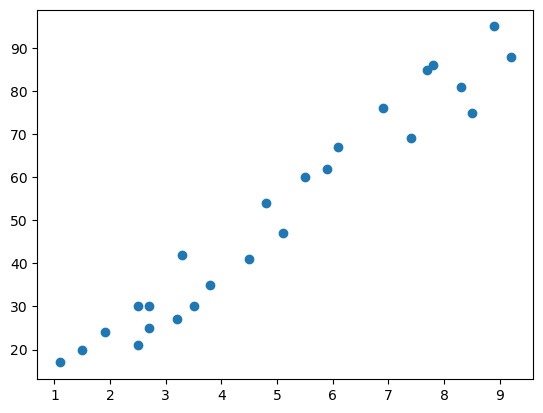

In [3]:
plt.plot(data['Hours'],data['Scores'],'o')

##### The scatter plot shows linearity  

#### STEP 4: Correlation using heatmap

<AxesSubplot:>

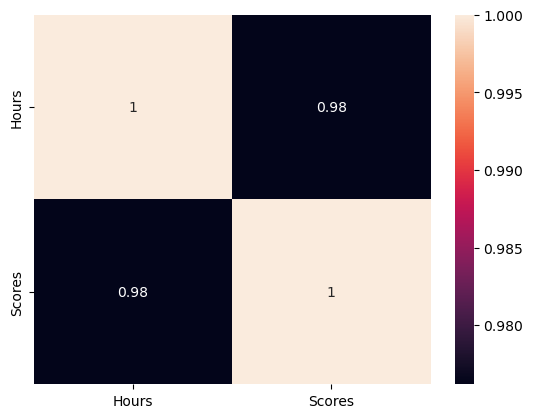

In [4]:
correlation = data.corr()
sns.heatmap(correlation,annot=True)

##### As you can see from the heat map the hours of study and the scores have a strong positive correlation 

#### STEP 5: Extracting the labels and features from the dataset

In [5]:
labels=np.array(data['Scores'])
features=np.array(data['Hours'])
features=features.reshape(-1, 1)

#### STEP 6: Splitting labels and features into test and train data

In [6]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.25,random_state=42)

#### STEP 7: Importing and training the linear regression model from sklearn

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression()

#### STEP 8: Predicting the scores using the hours from test_features

In [8]:
pred=lin_reg.predict(test_features)
pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

#### STEP 9: Comparing the actual and predicted test scores

In [9]:
comp=pd.DataFrame({'Actual_Scores':test_labels,'Predicted_Scores':pred})
comp.head()

,Actual_Scores,Predicted_Scores
0,81,83.107332
1,30,26.765598
2,21,26.765598
3,76,69.507603
4,62,59.793511


#### STEP 10: Check the mean absolute percentage error and accuracy

In [10]:
# Calculate the absolute errors
errors = abs(pred - test_labels)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 87.78 %.


#### Final step: Predicting the score using hours of study entered by the user

In [11]:
hrs=float(input("Enter the hours of study: "))

Enter the hours of study: 9.25


In [20]:
print(f"Score:{lin_reg.predict([[hrs]])}")

Score:[92.33571987]
